In [74]:
pip install pydotplus



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: /Library/Frameworks/Python.framework/Versions/3.12/bin/python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install graphviz


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: /Library/Frameworks/Python.framework/Versions/3.12/bin/python3.12 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import joblib
import graphviz
import pydotplus
import plotly.graph_objects as go

from scipy import stats
from datetime import date
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from skompiler import skompile

import warnings
warnings.simplefilter(action="ignore")


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <6749C431-FD87-3912-A7CF-11CB9194D072> /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


In [77]:
df = pd.read_csv("Churn1.csv")


In [78]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [79]:
def check_df(dataframe,head=5):
    print("#########SHAPE###########")
    print(dataframe.shape)
    print("#########TYPES###########")
    print(dataframe.dtypes)
    print("#########Head###########")
    print(dataframe.head(head))
    print("#########NA###########")
    null_counts = dataframe.isnull().sum()
    print(null_counts)
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_df(df)

#########SHAPE###########
(7043, 21)
#########TYPES###########
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
#########Head###########
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2       

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [80]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce')

In [81]:
df['SeniorCitizen']= df['SeniorCitizen'].astype("O")

In [82]:
df["Churn"] = df["Churn"].apply(lambda x : 1 if x == "Yes" else 0)

In [83]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [85]:
def grab_col_names(dataframe, cat_th=10,car_th=20):
    """
    Returns 
    cat_cols : list
    Categorical variable list
    num_cols : list
    Numeric variable list
    cat_but_car : List
    List of cardinal variables with categorical appearence
    NOTES : 
    cat_cols +num_cols + cat_but_car = number of variables"""
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes=="O"]
    num_but_cat =[col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                  dataframe[col].dtypes!= "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                  dataframe[col].dtypes =="O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in cat_but_car]
    print(f"Categorical Columns : {cat_cols}")
    print(f"Numerical Columns : {num_cols}")
    print(f"Categorical but cordinal :{cat_but_car}")
    print(f"Numerical but categorical :{num_but_cat}")
    return cat_cols, num_cols,cat_but_car,num_but_cat


In [86]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)


Categorical Columns : ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical Columns : ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
Categorical but cordinal :['customerID']
Numerical but categorical :['Churn']


In [87]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [88]:
num_but_cat

['Churn']

In [89]:
cat_but_car

['customerID']

# Analysis of Categorical Variables

In [90]:
import matplotlib.pyplot as plt
def cat_summary(dataframe,col_name, plot=False):
    print(pd.DataFrame({col_name:dataframe[col_name].value_counts(),
                        "Ratio":100*dataframe[col_name].value_counts()/len(dataframe)}))
    print("############################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data = dataframe)
        plt.show()

        gender     Ratio
gender                  
Male      3555  50.47565
Female    3488  49.52435
############################################


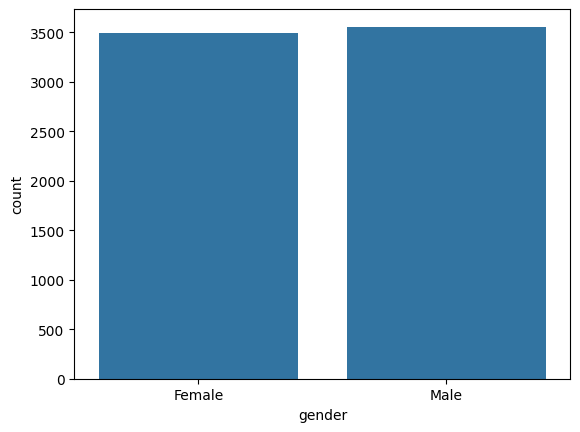

               SeniorCitizen      Ratio
SeniorCitizen                          
0                       5901  83.785319
1                       1142  16.214681
############################################


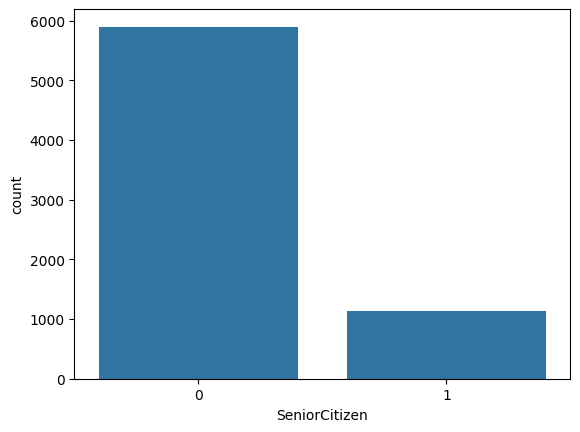

         Partner     Ratio
Partner                   
No          3641  51.69672
Yes         3402  48.30328
############################################


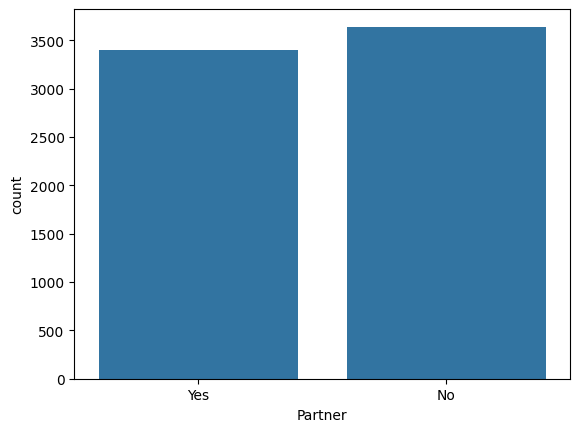

            Dependents      Ratio
Dependents                       
No                4933  70.041176
Yes               2110  29.958824
############################################


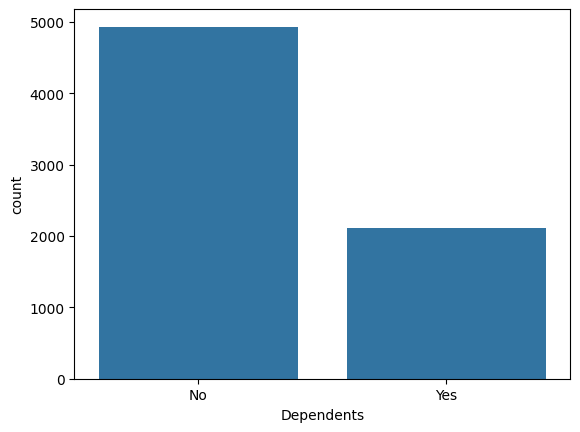

              PhoneService      Ratio
PhoneService                         
Yes                   6361  90.316626
No                     682   9.683374
############################################


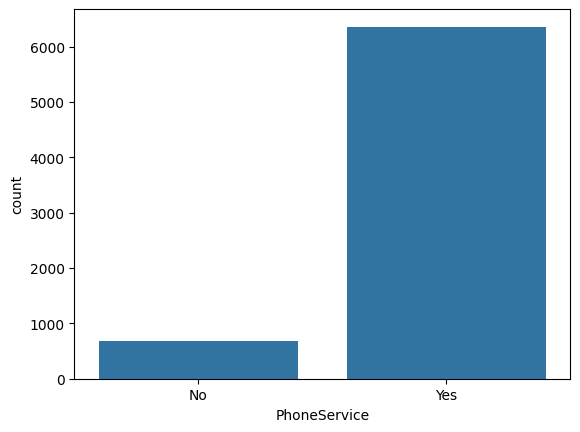

                  MultipleLines      Ratio
MultipleLines                             
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374
############################################


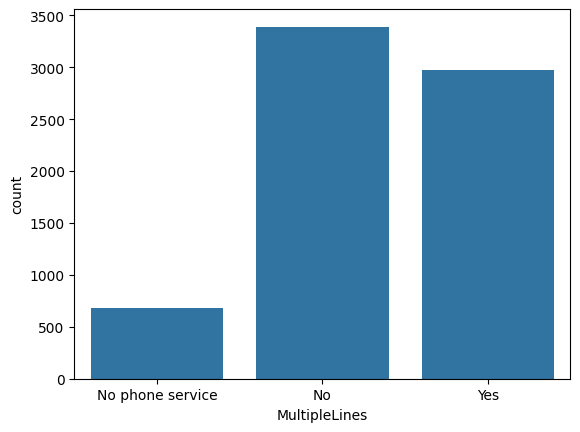

                 InternetService      Ratio
InternetService                            
Fiber optic                 3096  43.958540
DSL                         2421  34.374556
No                          1526  21.666903
############################################


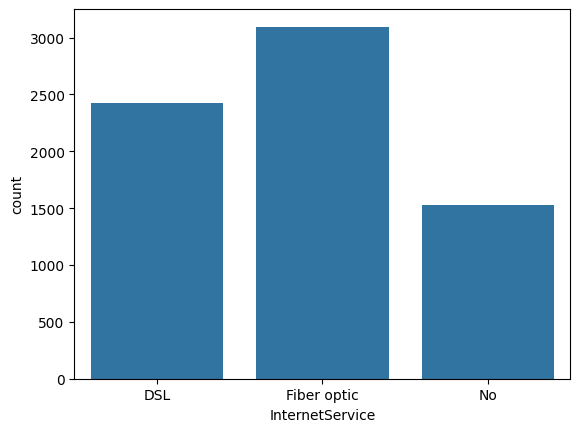

                     OnlineSecurity      Ratio
OnlineSecurity                                
No                             3498  49.666335
Yes                            2019  28.666761
No internet service            1526  21.666903
############################################


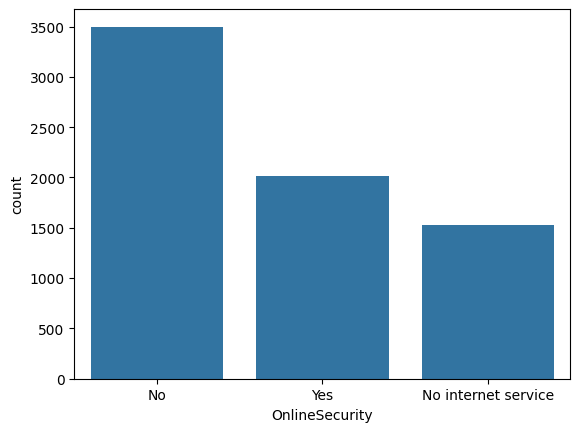

                     OnlineBackup      Ratio
OnlineBackup                                
No                           3088  43.844952
Yes                          2429  34.488144
No internet service          1526  21.666903
############################################


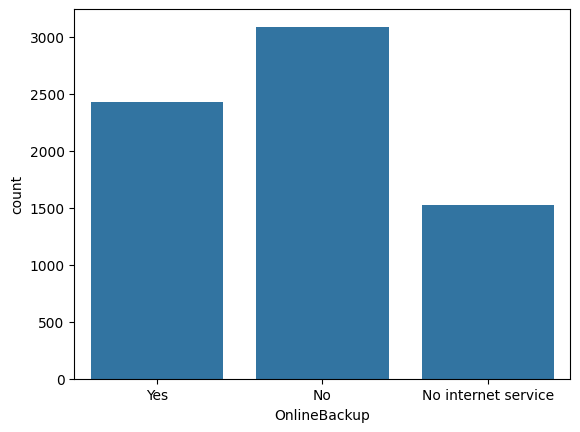

                     DeviceProtection      Ratio
DeviceProtection                                
No                               3095  43.944342
Yes                              2422  34.388755
No internet service              1526  21.666903
############################################


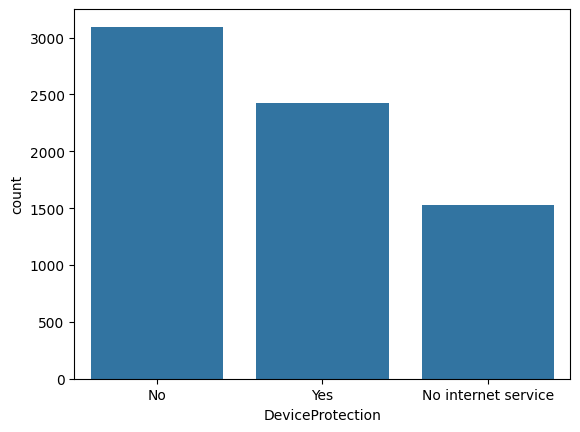

                     TechSupport      Ratio
TechSupport                                
No                          3473  49.311373
Yes                         2044  29.021724
No internet service         1526  21.666903
############################################


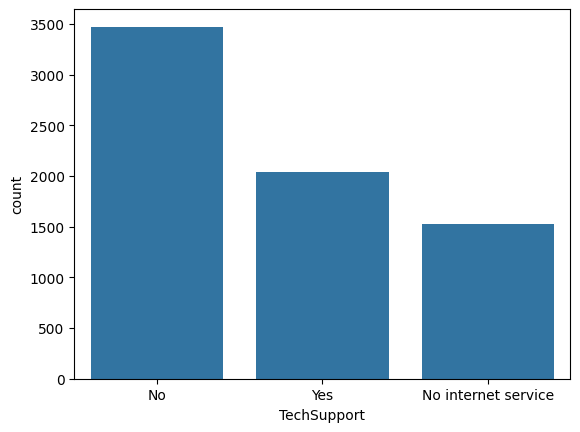

                     StreamingTV      Ratio
StreamingTV                                
No                          2810  39.897771
Yes                         2707  38.435326
No internet service         1526  21.666903
############################################


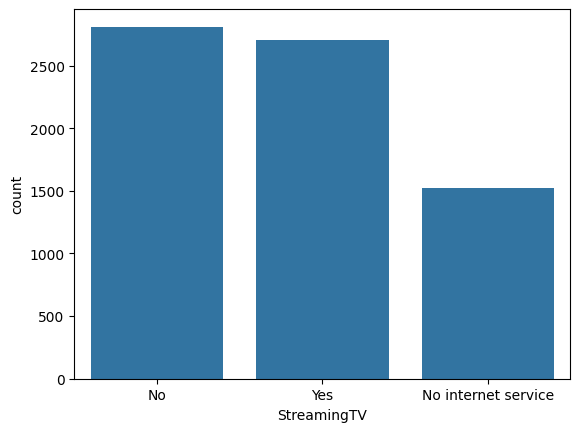

                     StreamingMovies      Ratio
StreamingMovies                                
No                              2785  39.542808
Yes                             2732  38.790288
No internet service             1526  21.666903
############################################


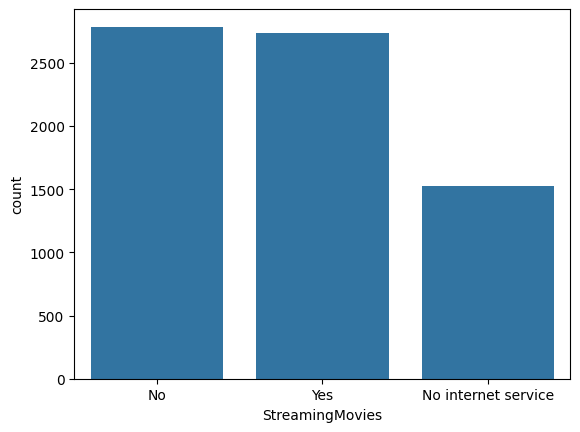

                Contract      Ratio
Contract                           
Month-to-month      3875  55.019168
Two year            1695  24.066449
One year            1473  20.914383
############################################


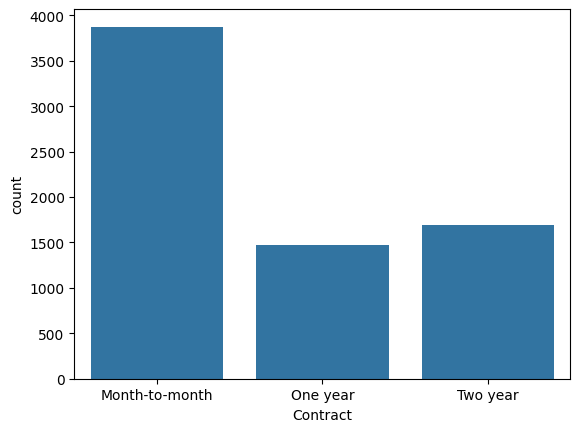

                  PaperlessBilling      Ratio
PaperlessBilling                             
Yes                           4171  59.221922
No                            2872  40.778078
############################################


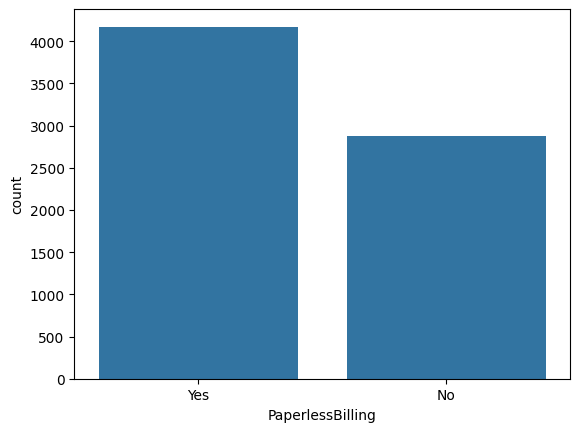

                           PaymentMethod      Ratio
PaymentMethod                                      
Electronic check                    2365  33.579441
Mailed check                        1612  22.887974
Bank transfer (automatic)           1544  21.922476
Credit card (automatic)             1522  21.610109
############################################


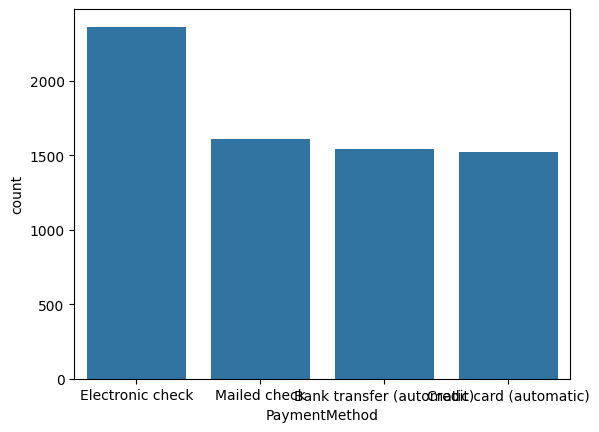

       Churn      Ratio
Churn                  
0       5174  73.463013
1       1869  26.536987
############################################


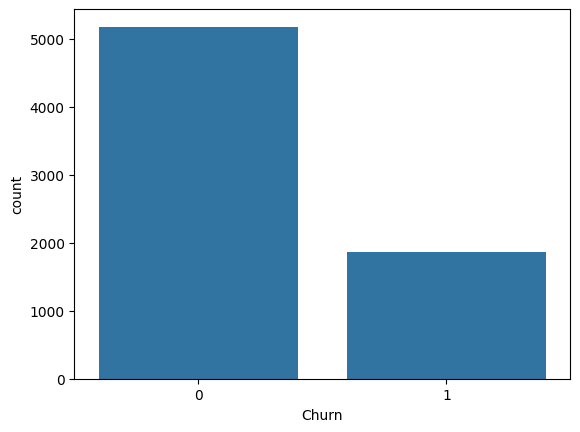

In [91]:
for col in cat_cols:
    cat_summary(df,col, plot= True)

In [92]:
def num_summary(dataframe, numerical_col, plot= False):
    quantiles = [0.05,0.10,0.20,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
5%          1.000000
10%         2.000000
20%         6.000000
30%        12.000000
40%        20.000000
50%        29.000000
60%        40.000000
70%        50.000000
80%        60.000000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64


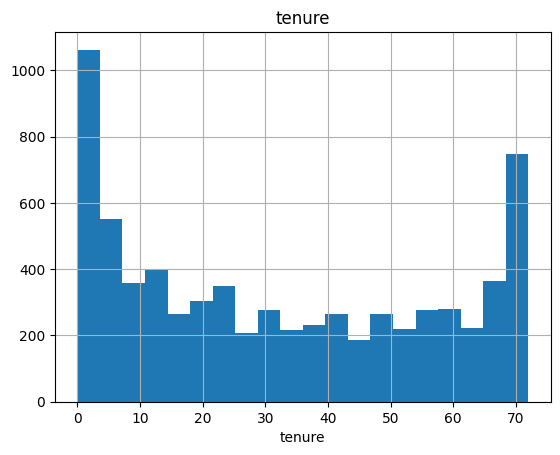

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
10%        20.050000
20%        25.050000
30%        45.850000
40%        58.830000
50%        70.350000
60%        79.100000
70%        85.500000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64


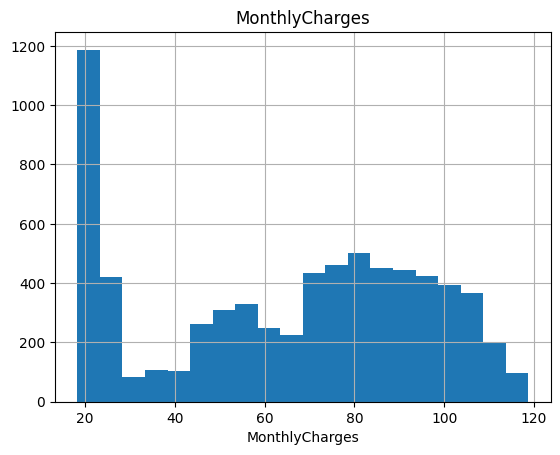

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
5%         49.605000
10%        84.600000
20%       267.070000
30%       551.995000
40%       944.170000
50%      1397.475000
60%      2048.950000
70%      3141.130000
80%      4475.410000
90%      5976.640000
95%      6923.590000
99%      8039.883000
max      8684.800000
Name: TotalCharges, dtype: float64


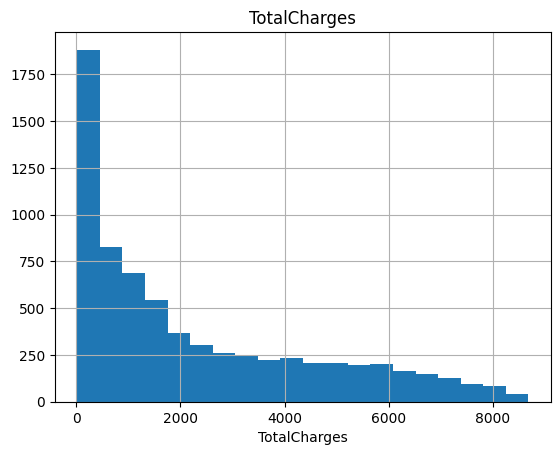

count    7043.000000
mean        0.265370
std         0.441561
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         1.000000
90%         1.000000
95%         1.000000
99%         1.000000
max         1.000000
Name: Churn, dtype: float64


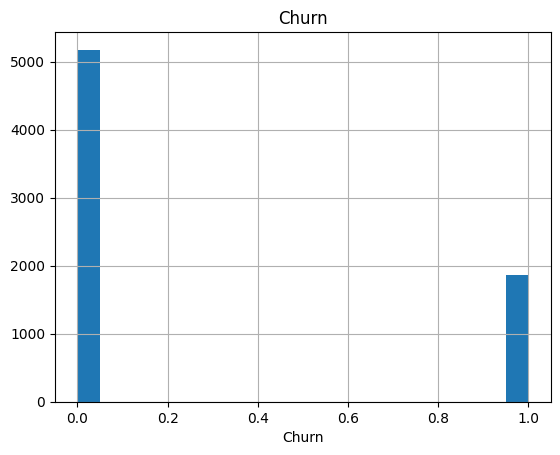

In [93]:
for col in num_cols:
    num_summary(df,col,plot=True)

# Analysis of Numeric Varaibles by Target

In [94]:
def target_summary_with_num(dataframe,target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col : "mean"}), end = "\n\n\n")
    

In [95]:
for col in num_cols:
    target_summary_with_num(df,"Churn",col)

          tenure
Churn           
0      37.569965
1      17.979133


       MonthlyCharges
Churn                
0           61.265124
1           74.441332


       TotalCharges
Churn              
0       2555.344141
1       1531.796094


       Churn
Churn       
0        0.0
1        1.0




# Analysis of Categorical variable by Target

In [96]:
def target_summary_with_cat(dataframe, target,categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET MEAN" : dataframe.groupby(categorical_col)[target].mean(),
    "Count" : dataframe[categorical_col].value_counts(),
    "Ratio" : 100* dataframe[categorical_col].value_counts() / len(dataframe)}), end ="\n\n\n")
    

In [97]:
for col in cat_cols:
    target_summary_with_cat(df, "Churn",col)

gender
        TARGET MEAN  Count     Ratio
gender                              
Female     0.269209   3488  49.52435
Male       0.261603   3555  50.47565


SeniorCitizen
               TARGET MEAN  Count      Ratio
SeniorCitizen                               
0                 0.236062   5901  83.785319
1                 0.416813   1142  16.214681


Partner
         TARGET MEAN  Count     Ratio
Partner                              
No          0.329580   3641  51.69672
Yes         0.196649   3402  48.30328


Dependents
            TARGET MEAN  Count      Ratio
Dependents                               
No             0.312791   4933  70.041176
Yes            0.154502   2110  29.958824


PhoneService
              TARGET MEAN  Count      Ratio
PhoneService                               
No               0.249267    682   9.683374
Yes              0.267096   6361  90.316626


MultipleLines
                  TARGET MEAN  Count      Ratio
MultipleLines                                  
No 

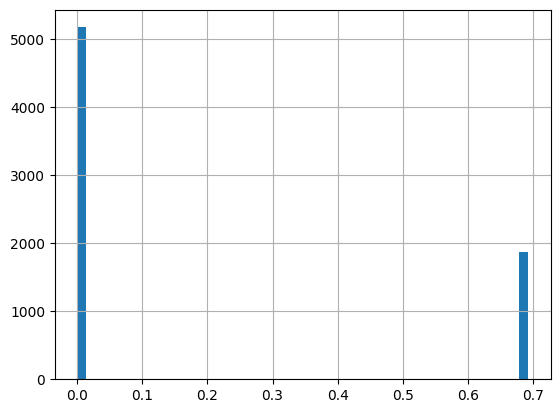

In [98]:
np.log1p(df["Churn"]).hist(bins=50)
plt.show(block = True)


# Correlation Analysis

In [99]:
corr = df[num_cols].corr()

In [100]:
corr

,tenure,MonthlyCharges,TotalCharges,Churn
tenure,1.000000,0.247900,0.825880,-0.352229
MonthlyCharges,0.247900,1.000000,0.651065,0.193356
TotalCharges,0.825880,0.651065,1.000000,-0.199484
Churn,-0.352229,0.193356,-0.199484,1.000000


# Missing Value Analysis

In [101]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [102]:
df["TotalCharges"].fillna(df["TotalCharges"].median(),inplace=True)

/var/folders/k4/qwl4tccn4lvbph5bsftcp1dh0000gn/T/ipykernel_15902/1795292956.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(),inplace=True)


In [103]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [104]:
def outlier_threshold(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquartile_range = quartile3-quartile1
    up_limit = quartile3 + 1.5 * interquartile_range
    low_limit = quartile1- 1.5* interquartile_range
    return low_limit, up_limit

In [105]:
def check_outlier(dataframe, col_name, plot=False):
    low_limit, up_limit = outlier_threshold(dataframe, col_name)
    outliers = dataframe[(dataframe[col_name]>up_limit) | (dataframe[col_name]<low_limit)]
    if outliers.any(axis=None):
        df = df[(df[col_name] >= low_limit) & (df[col_name] <= up_limit)]


In [106]:
for col in num_cols:
    check_outlier(df,col)

In [107]:
dff=df.copy()

In [108]:
cat_cols = [col for col in cat_cols if col not in ["Churn"]]

In [109]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [110]:
def one_hot_encoding(dataframe, categorical_cols,drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns = categorical_cols,drop_first=drop_first)
    return dataframe

In [111]:
dff = one_hot_encoding(dff,cat_cols)

In [112]:
dff.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,True,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
1,5575-GNVDE,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,3668-QPYBK,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,7795-CFOCW,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,9237-HQITU,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [113]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [114]:
dff[num_cols] = scaler.fit_transform(dff[num_cols])

In [115]:
dff.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,-0.608696,-0.745170,-0.404100,0.0,True,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
1,5575-GNVDE,0.108696,-0.246550,0.145381,0.0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,3668-QPYBK,-0.586957,-0.303588,-0.380964,1.0,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,7795-CFOCW,0.347826,-0.516099,0.130977,0.0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,9237-HQITU,-0.586957,0.006440,-0.368111,1.0,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [116]:
y = dff["Churn"]

In [117]:
X = dff.drop(["customerID","Churn"],axis=1)

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from skompiler import skompile
from catboost import CatBoostClassifier


In [125]:
Xlstm = X.values.reshape((X.shape[0], 1, X.shape[1]))
print(Xlstm.shape)
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.wrappers.scikit_learn import KerasClassifier

(7043, 1, 46)


In [127]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.wrappers.scikit_learn import KerasClassifier

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Assuming the input shape is (1, number_of_features)
input_shape = (1, Xlstm.shape[2])

# Create the KerasClassifier
lstm_model = KerasClassifier(build_fn=create_lstm_model, input_shape=input_shape)


/var/folders/k4/qwl4tccn4lvbph5bsftcp1dh0000gn/T/ipykernel_15902/2712723542.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasClassifier(build_fn=create_lstm_model, input_shape=input_shape)


In [140]:
models.append(('LSTM', lstm_model))
loss = 'softmax_cross_entropy'
X_train, X_test, y_train, y_test = train_test_split(Xlstm, y, test_size=0.2, random_state=12345)

lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the LSTM model
loss, accuracy = lstm_model.score(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

AttributeError: module 'keras.api.losses' has no attribute 'is_categorical_crossentropy'

In [133]:
models = [('LR' , LogisticRegression(random_state=12345)),
           ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier(random_state=12345)),
           ("RF",RandomForestClassifier(random_state=12345)),
           ("CatBoost",CatBoostClassifier(verbose=False, random_state=12345))]

In [134]:
base_models_metrics=[]
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')
X.isnull().sum()

tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
gender_Female                              0
gender_Male                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBack

In [136]:
for name, model in models:
    cv_results = cross_validate(model,X,y,cv=5,scoring=["accuracy","f1","roc_auc","precision","recall"])
    accuracy= round(cv_results['test_accuracy'].mean(),4)
    auc = round(cv_results['test_roc_auc'].mean(),4)
    recall = round(cv_results['test_recall'].mean(),4)
    precision = round(cv_results['test_precision'].mean(),4)
    f1 = round(cv_results['test_f1'].mean(),4)
    base_models_metrics.append({
    "Model":name,
    "Accuracy":accuracy,
    "AUC":auc,
    "Recall": recall,
    "Precision":precision,
    "F1":f1})
    print(f"#########{name}########")
    print(f"Accuracy : {accuracy}")
    print(f"AUC:{auc}")
    print(f"Recall:{recall}")
    print(f"Precision:{precision}")
    print(f"F1:{f1}")

#########LR########
Accuracy : 0.8041
AUC:0.8452
Recall:0.5516
Precision:0.6554
F1:0.5989
#########KNN########
Accuracy : 0.7673
AUC:0.7802
Recall:0.5313
Precision:0.5655
F1:0.5478
#########CART########
Accuracy : 0.7277
AUC:0.6565
Recall:0.5002
Precision:0.4873
F1:0.4935
#########RF########
Accuracy : 0.7886
AUC:0.8182
Recall:0.4842
Precision:0.6343
F1:0.5488
#########CatBoost########
Accuracy : 0.7933
AUC:0.8392
Recall:0.4976
Precision:0.6438
F1:0.561


In [137]:
import joblib
logistic_regression_model = None
for name, model in models:
    if name == 'LR':
        logistic_regression_model = model
        break
joblib.dump(logistic_regression_model, 'model_filename.pkl')


['model_filename.pkl']